# Car Brand Classification using Deep Learning

In [32]:
# Importing thr required libraries.
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


In [1]:
# First upload the dataset.zip file. Then unzip it
! unzip Datasets.zip


Archive:  Datasets.zip
   creating: Datasets/
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
  inflating: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inf

In [18]:
# Resizing all the images.
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [19]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Imagenet weights will be used here.

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
##    [224,    224] + [3] => indicates RGB channel
#       |      |       |
#     Width  Height   RGB  

## In ResNet50 there are 1000 categories, but we just want 3 categories. So we are doing 'include_top=False' to not,
## first and the last layer.

In [20]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
# Don't need to train existing weights.
for layer in resnet.layers:
  layer.trainable = False

In [33]:
# To get number of output classes, we use 'glob'
import glob as glob
folders = glob.glob('Datasets/Train/*')

In [34]:
folders
print(len(folders))

3


In [36]:
## Adding our own layers.
x = Flatten()(resnet.output)

## Creating last(prediction) layer.
prediction = Dense(len(folders), activation = 'softmax')(x)

In [39]:
# Creating the model.
model = Model(inputs = resnet.input, outputs = prediction)


In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [41]:
# Compiling the model.
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [42]:
# Using image data generator to import the images from the dataset.
train_datagen = ImageDataGenerator(rescale = 1./255,  # Normalization
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
# Creating training_set and test_set.
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),  # It should be same as initialized above
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                                 target_size = (224, 224),  # It should be same as initialized above
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [44]:
# Model Fitting
r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 16s 9s/step - loss: 3.7508 - accuracy: 0.3906 - val_loss: 17.2930 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 12s 9s/step - loss: 9.8770 - accuracy: 0.3594 - val_loss: 9.1329 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 12s 8s/step - loss: 4.2278 - accuracy: 0.4844 - val_loss: 1.8678 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 12s 9s/step - loss: 2.9400 - accuracy: 0.3594 - val_loss: 1.8084 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 12s 9s/step - loss: 1.3513 - accuracy: 0.5312 - val_loss: 3.8646 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 12s 8s/step - loss: 2.4595 - accuracy: 0.5312 - val_loss: 4.2871 - val_accuracy: 0.2759
Epoch 7/50
2/2 [==============================] - 12s 8s/step - loss: 2.1818 - accuracy: 0.5312 - val_loss: 1.1367 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=================

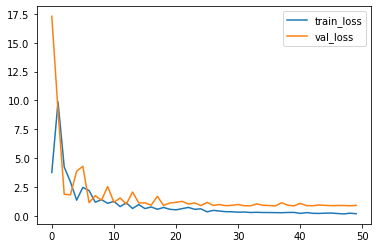

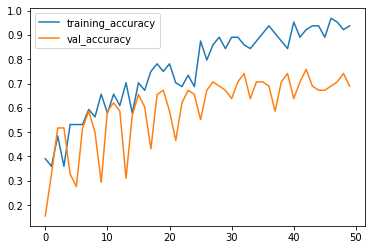

<Figure size 432x288 with 0 Axes>

In [45]:
# Plotting the loss and accuracy
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('loss_val_loss')

plt.plot(r.history['accuracy'], label = 'training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()
plt.savefig('acc_val_acc')


In [47]:
# saving the model as an h5 file.
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Prediction

In [48]:
y_pred = model.predict(test_set)
y_pred

array([[4.1982979e-02, 3.0206764e-01, 6.5594935e-01],
       [1.6371360e-02, 1.4861871e-01, 8.3500987e-01],
       [2.7943155e-02, 8.2620412e-01, 1.4585274e-01],
       [7.2395965e-03, 9.9112552e-01, 1.6348239e-03],
       [4.6575735e-03, 9.4629908e-01, 4.9043372e-02],
       [4.2379282e-02, 7.2665042e-01, 2.3097020e-01],
       [2.2619717e-02, 7.4125761e-01, 2.3612268e-01],
       [1.6972141e-02, 8.7669200e-01, 1.0633584e-01],
       [5.5628209e-03, 1.4676264e-03, 9.9296957e-01],
       [1.9616570e-01, 3.9306414e-01, 4.1077021e-01],
       [1.9405000e-01, 4.8066920e-01, 3.2528079e-01],
       [1.7834311e-02, 2.0227926e-03, 9.8014289e-01],
       [1.7990662e-02, 6.3815200e-01, 3.4385738e-01],
       [2.8234715e-02, 7.4013375e-02, 8.9775187e-01],
       [5.6723964e-01, 1.9720885e-01, 2.3555149e-01],
       [1.6517619e-02, 1.4234848e-04, 9.8334002e-01],
       [6.7567758e-02, 6.9882326e-02, 8.6254984e-01],
       [4.2257649e-03, 9.4386184e-01, 5.1912401e-02],
       [6.0789619e-04, 7.523

In [49]:
## getting results for all the images in test set.
y_pred = np.argmax(y_pred, axis = 1)
y_pred

# 0 => audi
# 1 => lamborgini
# 2 => mercedes


array([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2])

In [50]:
# saving the model as an h5 file.
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Predicting for new images.


In [59]:
from tensorflow.keras.preprocessing import image

# Uploading an image
img = image.load_img('/content/Datasets/Test/mercedes/35.jpg', target_size = (224, 224))
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0.06116934, 0.09101519, 0.84781545]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [58]:
a

array([2])

In [62]:
# creating the pickle file too.
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'model_resnet50.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

/content/projectname.pickle
